### (1) 피봇팅의 필요성

- 방정식의 순서가 결과에 큰 영향을 미칠 수 있음
- 소거 단계에서 방정식의 순서를 재배열하는 것이 매우 중요함
    - 행의 순서를 바꾸면 엄밀해를 얻을 수 있으나 Gauss 소거법이 실패할 수도 있음
    - **피봇 요소가 0일 경우 or 피봇행의 다른 요소에 비해 매우 작을 경우 재배열 (reordering) 또는 행피봇팅 (row pivoting) 이 필요**
    - 피봇 요소가 매우 작지 않고 상당히 크더라도, 마무리오차는 신뢰할 수 없음

### (2) 대각지배성

- **대각지배적 (diagonally dominant) : n x n 행렬 A에서 각 대각요소의 절대값이 그 행의 다른 요소의 절대값의 합보다 큰 경우** 
    - 행을 재배열하며 대각지배적 여부를 결정할 수 있음
    - Ax = b의 계수행렬이 대각지배적이면 최적 순서로 배열되어 있음
    - 계수행렬이 가능한 대각지배에 가깝게 되도록 방정식을 재배열

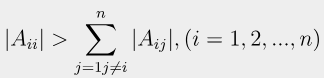

### (3) 크기조정 행피봇팅과 Gauss 소거법

- 행피봇팅 (scaled row pivoting) 과 Gauss 소거법에 의해 Ax = b를 푸는 방법
- 피봇팅의 목적
    - 계수 행렬의 대각지배성을 개선
    - 피봇 요소를 피봇행의 다른 요소에 비해 가능한 크게 만드는 것

**i행의 축척계수 (scale factor) : 행렬 A의 i행에서 가장 큰 요소의 절대값**

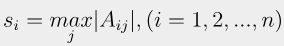

In [ ]:
for i in range(n):
    s[i] = max(abs(a[i, :]))

**요소 Aij의 상대적인 크기**
- i행에서 가장 큰 요소의 상대적인 크기
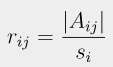

**소거 단계가 k번째 행이 피봇행인 단계**
- 확대계수행렬에서 다음 피봇 요소를 자동적으로 채택하지 않음
- 더 좋은 피봇을 Akk 아래의 k번째 열에서 찾음
- 최적의 선택은 상대 크기가 최대인 요소 Apk

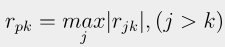

- 만일 이런 요소를 찾게 되면 k행과 p행을 교환하고 소거 과정을 계속 진행
- 이에 대응하는 행교환은 크기조정계수 배열 s에서 수행

In [ ]:
for k in range(0, n-1):
    # 최대 상대크기를 갖는 요소를 포함한 행을 찾기
    p = argmax(abs(a[k:n, k])/s[k:n]) + k # 벡터 v에서 가장 큰 요소의 지수를 반환
    
    # 만일 이 요소가 매우 작으면, 이 행렬은 특이
    if abs(a[p, k]) < tol:
        error.err('행렬이 특이')
    
    # k행과 p행이 교환되어야 하는지 검토
    if p != k:
        # 필요시 행교환
        SwapRC.swapRows(b, k, p)
        SwapRC.swapRows(s, k, p)
        SwapRC.swapRows(a, k, p)
    
    # 소거법 진행

### (4) 피봇팅 여부

**피봇팅의 두 가지 단점**
- 1. 계산 비용의 증가
- 2. 계수행렬의 대칭성과 대역 구조를 파괴

In [1]:
# 행피봇팅을 이용한 Gauss 소거법
import numpy as np
from GaussPivot import *

if __name__ == '__main__':
    A = np.array([[2.0, -2.0, 6.0],
                  [-2.0, 4.0, 3.0],
                  [-1.0, 8.0, 4.0]])
    b = np.array([16.0, 0.0, -1.0])
    
    AOrig = A.copy()
    bOrig = b.copy()
    
    # Gauss 소거법에 의한 풀이
    x = GaussPivot(A, b)
    
    print('\n계산 결과: \nx = \n', x)
    print('\n결과 확인: [A]{x} - b = \n', np.dot(AOrig, x) - bOrig)


계산 결과: 
x = 
 [ 1. -1.  2.]

결과 확인: [A]{x} - b = 
 [0. 0. 0.]
